## INTRO

Logistic regression is one of the supervised ML model algorithms. It is ideally suited for business analytics applications where the target variable is a binary decision (fail/pass, response/no response, etc.). Unlike linear regression, it works well with data that is not linear

#### Problem:Given a dataset of `Hours Studied` and `
ass / Fail`, pPredict whether a student will pass or failan exam  based on the number of hours they study An output of 1 means Pass, while 0 means Fail.


#### DATA COLLECTION/GATHERING

In [35]:
# importing required libraries

import pandas as pd
from matplotlib import pyplot as plt

# to perform our logistic regression
from sklearn.linear_model import LogisticRegression

# to split our dataset into the training data and test data (used to evaluate the performance of our model)
from sklearn.model_selection import train_test_split

# to generate the confusion matrix of the classifiers; confusion matrix is used to evaluate
# classification models where the targets should be discrete or categorical.
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
# Creating a sample dataset of the problem
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Pass': [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]
}
df = pd.DataFrame(data)


In [20]:
# taking a peek at it

df.head()

,Hours_Studied,Pass
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1


#### DATA ASSESSMENT/CLEANING

In [21]:
# to get quick glimpse of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  20 non-null     int64
 1   Pass           20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


It is obvious we need no cleaning operation.

#### EDA

Text(0.5, 1.0, 'Scatter plot for logistic regression')

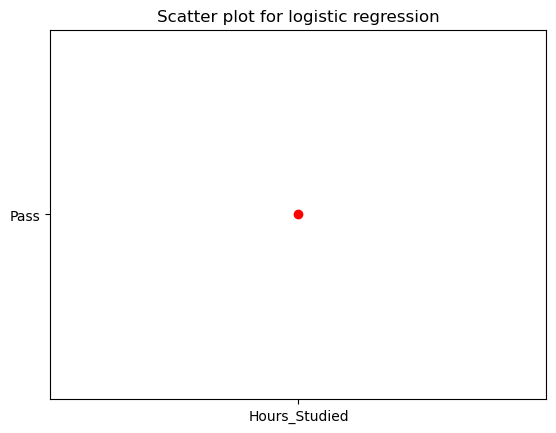

In [22]:
# using a scatterplot to visualize the r/ship btw predictor and target variables for the data we have generated

plt.scatter('Hours_Studied', 'Pass', c='red')
plt.title('Scatter plot for logistic regression')

As can be seen from the scatterplot and dataset itself, the data is not linear. Hence we cannot use a linear regression model for this data

#### MODEL BUILDING

In [23]:
# To reduce the chances of array mismatching, we split the existing df into two, one for features and
# the other for target
x = df[['Hours_Studied']]
y = df['Pass']

In [24]:
# Splitting our data into a training set and a test set.
# The random_state parameter is used to control the randomness of the dataset splitting, ensuring reproducibility
# of results. This ensures that every time you run the code with the same random state, the train and test sets
# will produce the same output. The number 42 has no special meaning. You can replace it with any other integer.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# to create a logistic regression object and fit it to our dataset, we will create a variable log_reg
# and then instantiate logistic regression as a function

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)  # used to train the model

LogisticRegression()

now that we have trained the logistic regression model, let us see how our model will perform on new data, using the test data

#### MODEL TESTING

In [26]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1], dtype=int64)

In [28]:
# Displaying our test dataset target values (actual values) so we can compare with predicted values

y_test

0     0
17    1
15    1
1     0
Name: Pass, dtype: int64

It is obvious that our model performed poorly as it did not get any of the predictions right

In [33]:
# Displaying the confusion matrix to see how well our model has performed on test data.  
# Confusion matrix is used to evaluate classification models where the targets should be discrete or categorical

confusion_matrix(y_test, y_pred)

array([[0, 2],
       [2, 0]], dtype=int64)

Notice that TP and TN are on the leading diagonal of the confusion matrix.

As seen from the results above, the True Positives TP (number of positives correctly predicted) is 0, True Negatives TN (number of negatives correctly predicted) is also 0.

The False Positives FP (number of positives wrongly predicted) is 2, and the False Negatives FN (number of negatives predicted wrongly) is 2.

Since we had low values of TP and TN but high values of FP and FN, our model performed very poorly. 

In [37]:
# Checking the accuracy score of the model to finalise

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.0


We have an accuracy of zero. This must have been caused by training our model with too little data. This is a classic example of what can happen when we are data-poor and embark on model training. 

In a situation like this, retraining our model with more data would help.